Simple notebook that shows how to create a comparer from scratch with Auxiliary date and filter

In [90]:
import modelskill as ms
import mikeio
import numpy as np

In [91]:
file=r'../tests/testdata/obs_two_items.dfs0'

First we create some random data for this example

In [92]:
data=mikeio.Dfs0(file).read().to_dataframe()
data['Temperature']=data['Temperature']+np.random.random(size=len(data))
data['Waves']=data['Temperature']+np.random.random(size=len(data))
data['Water Level']=data['Temperature']+np.random.random(size=len(data))
data

,Temperature,Water Level,Waves
2015-01-01 01:00:00,3.765260,3.862235,3.785870
2015-01-01 02:00:00,3.488153,3.530358,3.977829
2015-01-01 03:00:00,3.763207,4.587785,4.493785
2015-01-01 04:00:00,4.090368,4.645924,4.143113
2015-01-01 05:00:00,3.374945,3.554441,4.344376
...,...,...,...
2020-09-27 20:00:00,3.421887,3.531873,3.615233
2020-09-27 21:00:00,3.282840,3.322007,4.156146
2020-09-27 22:00:00,3.553412,4.319250,3.682936
2020-09-27 23:00:00,4.089186,4.575870,5.012598


<Axes: >

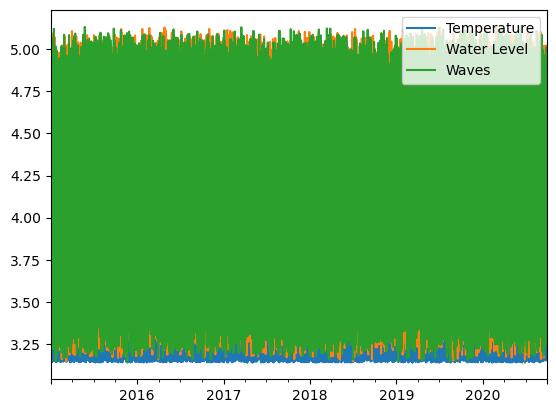

In [93]:
data.plot()

Now we make modelskill obs and mod objects

In [94]:
obs=ms.PointObservation(data=data,item='Temperature',aux_items='Waves',name='P1')
mod=ms.PointModelResult(data=data,item='Water Level',name='Mod1')

First we compare all data, and get ~50k points

In [95]:
cmp=ms.match(obs,mod)

<Axes: title={'center': 'Mod1 vs P1'}, xlabel='Observation,  []', ylabel='Model,  []'>

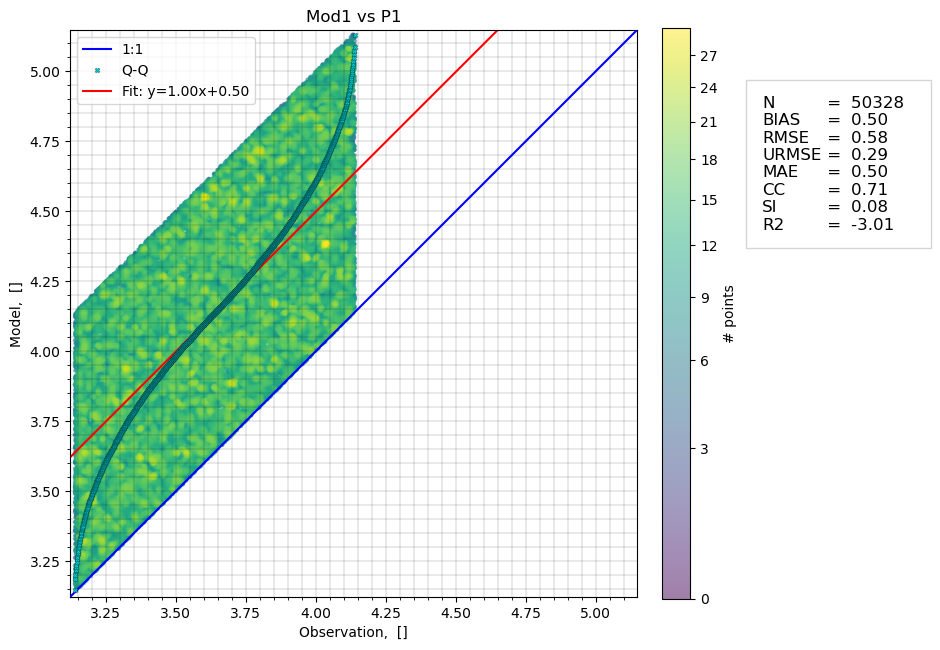

In [96]:
cmp.plot.scatter(show_points=True,skill_table=True)

Now we filter the comparer based on auxiliary data and get ~10k points

In [97]:
cmp_filtered=cmp.where(cmp.data['Waves']>4.5)

<Axes: title={'center': 'Mod1 vs P1'}, xlabel='Observation,  []', ylabel='Model,  []'>

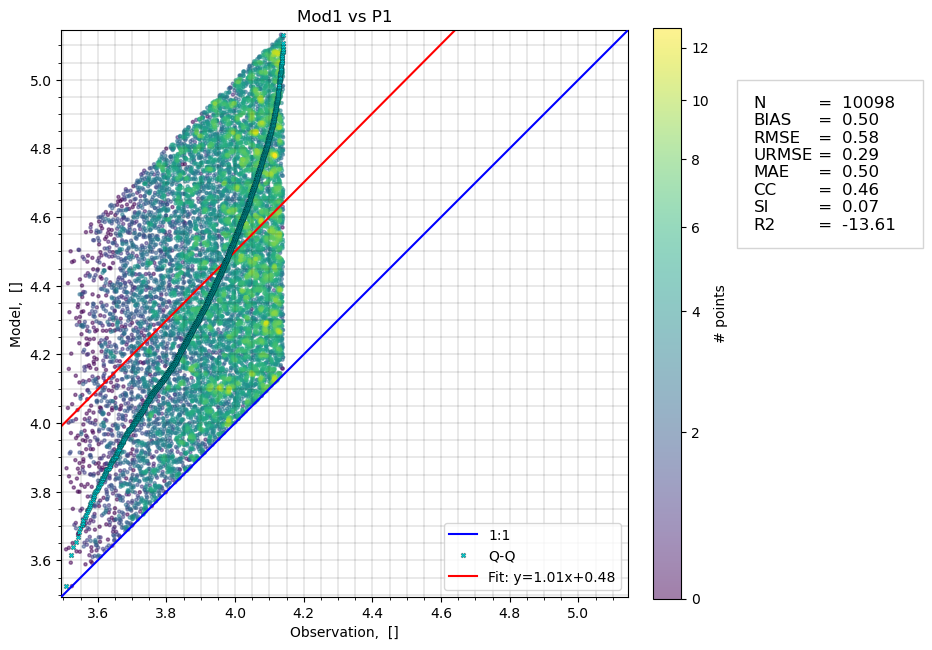

In [98]:
cmp_filtered.plot.scatter(show_points=True,skill_table=True)